In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.callbacks.hooks import *
import numpy as np
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
path = Path('/content/drive/My Drive/fast_ai/KDEF_and_AKDEF/KDEF_and_AKDEF')

In [0]:
valid_img_num = np.arange(28,32)
test_img_num = np.arange(32,36)

In [0]:
test_img = ImageList.from_folder(path/'KDEF').filter_by_func(lambda x: int(x.stem[2:4]) in (test_img_num))
test_labels = [x.stem[4:6] for x in test_img.items]

In [9]:
test_img

ImageList (569 items)
Image (3, 762, 562),Image (3, 762, 562),Image (3, 762, 562),Image (3, 762, 562),Image (3, 762, 562)
Path: /content/drive/My Drive/fast_ai/KDEF_and_AKDEF/KDEF_and_AKDEF/KDEF

In [10]:
src = (ImageList.from_folder(path/'KDEF')
      .filter_by_func(lambda x: int(x.stem[2:4]) not in (test_img_num))
      .split_by_valid_func(lambda x: int(x.stem[2:4]) in (valid_img_num))
      .label_from_func(lambda x: x.stem[4:6])
      .add_test(test_img))

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:525: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
V, H
  if getattr(ds, 'warn', False): warn(ds.warn)


In [0]:
src

LabelLists;

Train: LabelList (3780 items)
x: ImageList
Image (3, 762, 562),Image (3, 762, 562),Image (3, 762, 562),Image (3, 762, 562),Image (3, 762, 562)
y: CategoryList
AF,AF,AF,AF,AN
Path: /content/drive/My Drive/fast_ai/KDEF_and_AKDEF/KDEF_and_AKDEF/KDEF;

Valid: LabelList (566 items)
x: ImageList
Image (3, 762, 562),Image (3, 762, 562),Image (3, 762, 562),Image (3, 762, 562),Image (3, 762, 562)
y: CategoryList
AF,AF,AF,AF,AN
Path: /content/drive/My Drive/fast_ai/KDEF_and_AKDEF/KDEF_and_AKDEF/KDEF;

Test: LabelList (569 items)
x: ImageList
Image (3, 762, 562),Image (3, 762, 562),Image (3, 762, 562),Image (3, 762, 562),Image (3, 762, 562)
y: EmptyLabelList
,,,,
Path: /content/drive/My Drive/fast_ai/KDEF_and_AKDEF/KDEF_and_AKDEF/KDEF

In [0]:
bs = 64

In [0]:
data = (src.transform(get_transforms(), size = 128)
       .databunch(bs = bs)
       .normalize(imagenet_stats))

In [13]:
arch = models.resnet50
learn = cnn_learner(data, arch, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 94497338.75it/s]


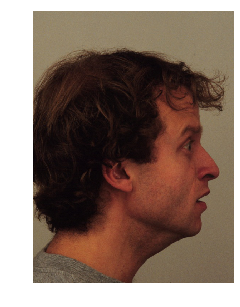

In [0]:
imgBM34 = get_image_files((path/'KDEF')/'BM34')
imgBM340 = imgBM34[0]
imgBM340_img = open_image(imgBM340)
imgBM340_img.show(figsize = (5,5))

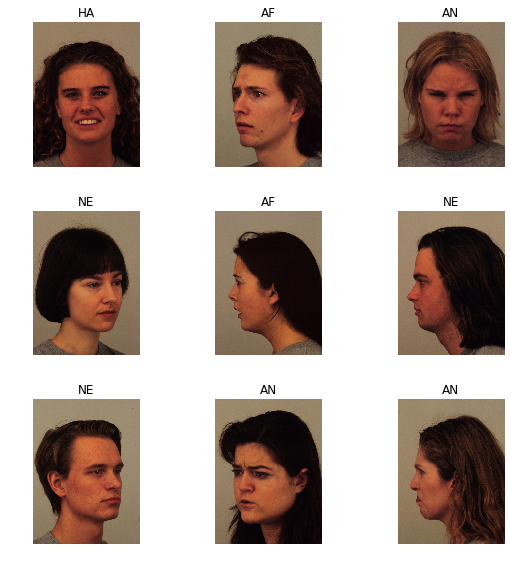

In [0]:
data.show_batch(rows=3, figsize = (8,8))

In [0]:
print(data.c)
print(data.classes)

7
['AF', 'AN', 'DI', 'HA', 'NE', 'SA', 'SU']


In [0]:
data

ImageDataBunch;

Train: LabelList (3780 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
AF,AF,AF,AF,AN
Path: /content/drive/My Drive/fast_ai/KDEF_and_AKDEF/KDEF_and_AKDEF/KDEF;

Valid: LabelList (566 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
AF,AF,AF,AF,AN
Path: /content/drive/My Drive/fast_ai/KDEF_and_AKDEF/KDEF_and_AKDEF/KDEF;

Test: LabelList (569 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: EmptyLabelList
,,,,
Path: /content/drive/My Drive/fast_ai/KDEF_and_AKDEF/KDEF_and_AKDEF/KDEF

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


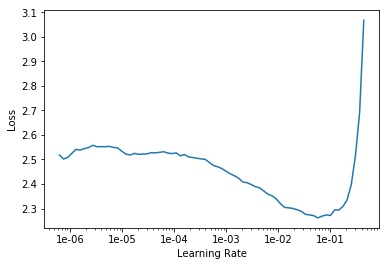

In [0]:
learn.recorder.plot()

In [0]:
lr = 4e-4
learn.fit_one_cycle(15, lr, pct_start=0.8)

epoch,train_loss,valid_loss,error_rate,time
0,2.428189,2.036899,0.818021,01:16
1,2.304758,1.933708,0.759717,01:16
2,2.197789,1.842341,0.703180,01:18
3,2.089246,1.779332,0.706714,01:18
4,1.950890,1.714613,0.662544,01:17
5,1.838916,1.657987,0.655477,01:17
6,1.717648,1.557075,0.625442,01:19
7,1.590860,1.502155,0.595406,01:16
8,1.474494,1.451410,0.565371,01:17
9,1.368068,1.363849,0.521201,01:17


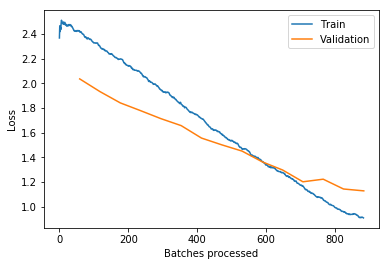

In [0]:
learn.recorder.plot_losses()

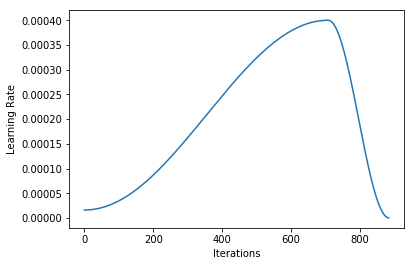

In [0]:
learn.recorder.plot_lr()

In [0]:
learn.save('model_128_stg1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


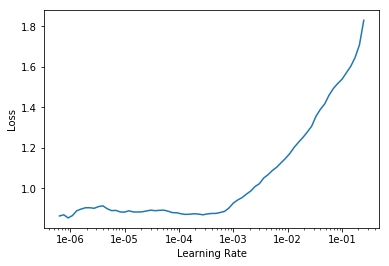

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(10, slice(2e-5, lr/5), pct_start = 0.8)

epoch,train_loss,valid_loss,error_rate,time
0,0.898993,1.102409,0.408127,01:20
1,0.879338,1.087529,0.385159,01:19
2,0.820357,1.029767,0.365724,01:19
3,0.779698,0.985156,0.337456,01:19
4,0.700266,0.921799,0.321555,01:19
5,0.617825,0.872029,0.303887,01:19
6,0.570229,0.818719,0.254417,01:19
7,0.502176,0.745072,0.252650,01:19
8,0.432824,0.768760,0.263251,01:20
9,0.360289,0.760062,0.250883,01:19


In [0]:
learn.save('model_128_stg2')

In [0]:
data_new = (src.transform(get_transforms(), size = 256)
            .databunch(bs = bs//2).normalize(imagenet_stats))

learn.data = data_new

In [0]:
learn.data

ImageDataBunch;

Train: LabelList (3780 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
AF,AF,AF,AF,AN
Path: /content/drive/My Drive/fast_ai/KDEF_and_AKDEF/KDEF_and_AKDEF/KDEF;

Valid: LabelList (566 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
AF,AF,AF,AF,AN
Path: /content/drive/My Drive/fast_ai/KDEF_and_AKDEF/KDEF_and_AKDEF/KDEF;

Test: LabelList (569 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: EmptyLabelList
,,,,
Path: /content/drive/My Drive/fast_ai/KDEF_and_AKDEF/KDEF_and_AKDEF/KDEF

In [0]:
learn.freeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


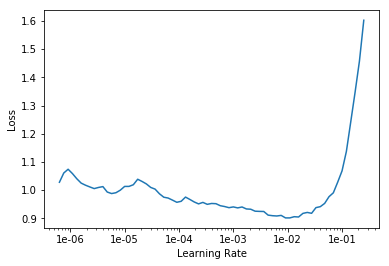

In [0]:
learn.recorder.plot()

In [0]:
lr = 2e-4
learn.fit_one_cycle(5, lr, pct_start=0.6)

epoch,train_loss,valid_loss,error_rate,time
0,0.951402,1.045217,0.367491,07:08
1,0.756121,0.912335,0.332155,02:28
2,0.611690,0.851033,0.303887,02:27
3,0.516683,0.788022,0.277385,02:28
4,0.470706,0.790083,0.275618,02:30


In [0]:
lr = 2e-4
learn.fit_one_cycle(5, lr, pct_start=0.6)

epoch,train_loss,valid_loss,error_rate,time
0,0.476508,0.792319,0.277385,02:27
1,0.443142,0.789391,0.273852,02:29
2,0.418104,0.786023,0.254417,02:28
3,0.385195,0.777543,0.240283,02:30
4,0.379798,0.760485,0.234982,02:28


In [0]:
lr = 2e-4
learn.fit_one_cycle(5, lr, pct_start=0.6)

epoch,train_loss,valid_loss,error_rate,time
0,0.354872,0.742880,0.229682,02:34
1,0.351483,0.746057,0.231449,02:35
2,0.354533,0.768938,0.242049,02:35
3,0.314894,0.745002,0.231449,02:31
4,0.287379,0.730720,0.229682,02:35


In [0]:
learn.save('model_256_stg1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


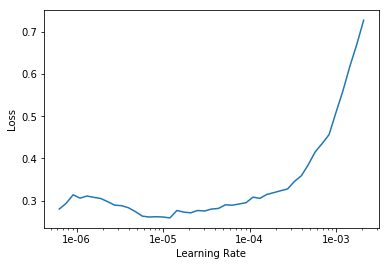

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(10, slice(2e-5, lr/5))

epoch,train_loss,valid_loss,error_rate,time
0,0.283413,0.737517,0.212014,02:35
1,0.307032,0.779277,0.238516,02:39
2,0.291913,0.781726,0.231449,02:39
3,0.252456,0.709850,0.233216,02:35
4,0.216843,0.634485,0.201413,02:38
5,0.169558,0.686264,0.194346,02:36
6,0.142458,0.624335,0.190813,02:37
7,0.130730,0.633605,0.196113,02:37
8,0.116262,0.619135,0.173145,02:42
9,0.105048,0.620943,0.183746,02:36


In [0]:
learn.save('model_256_stg2')

In [0]:
data_new_full = (src.transform(get_transforms(), size = (762, 562))
                 .databunch(bs = bs//4).normalize(imagenet_stats))
learn.data = data_new_full                 

In [0]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


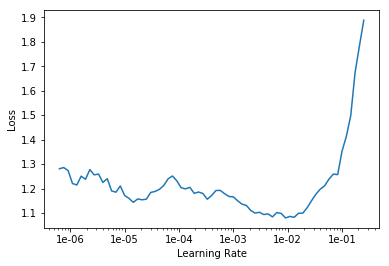

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lr = 2e-3
learn.fit_one_cycle(5, lr)

epoch,train_loss,valid_loss,error_rate,time
0,0.563664,0.769301,0.250883,10:05
1,0.521147,0.914669,0.266784,04:30
2,0.388444,0.659864,0.229682,04:28
3,0.243620,0.544233,0.173145,04:28
4,0.167759,0.502383,0.171378,04:30


In [0]:
learn.save('model_full_stg1')

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


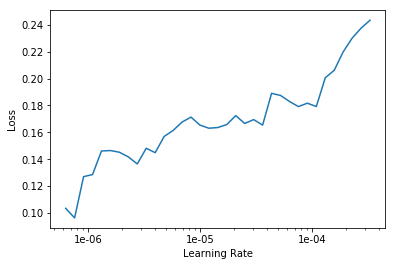

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(10, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,error_rate,time
0,0.188588,0.557098,0.173145,05:55
1,0.305800,0.780214,0.192580,05:54
2,0.310040,0.891484,0.268551,05:54
3,0.266081,0.676861,0.219081,05:54
4,0.172001,0.450124,0.136042,05:54
5,0.169516,0.495044,0.151943,05:54
6,0.104323,0.479773,0.143110,05:55
7,0.073058,0.416657,0.128975,05:54
8,0.060385,0.411561,0.121908,05:55
9,0.043532,0.416131,0.120141,05:55


In [0]:
learn.fit_one_cycle(4, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,error_rate,time
0,0.143355,0.640283,0.167845,05:55
1,0.182867,0.449291,0.146643,05:54
2,0.078662,0.402206,0.109541,05:54
3,0.056691,0.402674,0.120141,05:54


In [0]:
learn.save('model_full_stg2')

In [0]:
learn.export('final_model')

**Accuracy on validation and  test set**

In [0]:
data_new_full = (src.transform(get_transforms(), size = (762, 562))
                 .databunch(bs = bs//4).normalize(imagenet_stats))

In [0]:
learn = learn.load('model_full_stg2')

In [0]:
learn.data = data_new_full    

In [0]:
valid_pred = learn.get_preds()

In [0]:
accuracy(valid_pred[0], valid_pred[1])

tensor(0.8799)

In [0]:
test_pred = learn.get_preds(ds_type=DatasetType.Test)

In [0]:
map_dict = {v: k for k,v in enumerate(data_new_full.classes)}
map_dict

{'AF': 0, 'AN': 1, 'DI': 2, 'HA': 3, 'NE': 4, 'SA': 5, 'SU': 6}

In [0]:
true_test = [map_dict[i] for i in np.array(test_labels)]
pred_test = np.argmax(test_pred[0], axis = 1)
(torch.Tensor(true_test).long() == pred_test).float().mean()

tensor(0.9332)

**Working with Activations**

In [0]:
data_new_full = (src.transform(get_transforms(), size = (762, 562))
                 .databunch(bs = bs//4).normalize(imagenet_stats))

In [0]:
learn = learn.load('model_full_stg2')

In [0]:
learn.data = data_new_full    

In [0]:
m = learn.model.eval()

In [0]:
def hooked_backward(im, layer):
    with hook_output(layer) as hook_a: 
        preds = m(im)
    return hook_a

In [0]:
def extract_activations(setw = 'train', datat = data_new_full, layer = m[0]):
    acts_channel = torch.tensor([])
    acts_window = torch.tensor([])
    if setw == 'train': data_set = datat.train_ds
    elif setw == 'valid': data_set = datat.valid_ds
    else : data_set = datat.test_ds
    for i,l in data_set:
        im = datat.one_item(i)[0]
        acts = hooked_backward(im, layer = layer)
        if acts.stored.dim()>2:
            acts_mean_channel = acts.stored.cpu().mean(2).mean(2)
            acts_mean_window = acts.stored.cpu().mean(1)
            acts_channel = torch.cat((acts_channel, acts_mean_channel))
            acts_window = torch.cat((acts_window, acts_mean_window))
        else:
            acts_channel = torch.cat((acts_channel, acts.stored.cpu()))
    return(acts_channel, acts_window)

In [0]:
train_acts_channel, train_acts_window = extract_activations(setw = 'train')
print('done training!')
valid_acts_channel, valid_acts_window = extract_activations(setw = 'valid')
print('done validation!')
test_acts_channel, test_acts_window = extract_activations(setw = 'test')

done training!
done validation!


In [0]:
with open(path/'train_acts_window.pkl', 'wb') as file:
    pickle.dump(train_acts_window, file, protocol=pickle.HIGHEST_PROTOCOL)
with open(path/'train_acts_channel.pkl', 'wb') as file:
    pickle.dump(train_acts_channel, file, protocol=pickle.HIGHEST_PROTOCOL)

In [0]:
with open(path/'valid_acts_window.pkl', 'wb') as file:
    pickle.dump(valid_acts_window, file, protocol=pickle.HIGHEST_PROTOCOL)
with open(path/'valid_acts_channel.pkl', 'wb') as file:
    pickle.dump(valid_acts_channel, file, protocol=pickle.HIGHEST_PROTOCOL)

In [0]:
with open(path/'test_acts_window.pkl', 'wb') as file:
    pickle.dump(test_acts_window, file, protocol=pickle.HIGHEST_PROTOCOL)
with open(path/'test_acts_channel.pkl', 'wb') as file:
    pickle.dump(test_acts_channel, file, protocol=pickle.HIGHEST_PROTOCOL)

In [0]:
rev_map_dict = {v:k for k,v in map_dict.items()}

In [0]:
train_labels = [rev_map_dict[int(i)] for i in data_new_full.train_ds.y]
valid_labels = [rev_map_dict[int(i)] for i in data_new_full.valid_ds.y]

In [0]:
label_dict = {'train_labels': train_labels, 'valid_labels': valid_labels, 'test_labels': test_labels}

In [0]:
with open(path/'label_dict.pickle', 'wb') as file:
    pickle.dump(label_dict, file, protocol = pickle.HIGHEST_PROTOCOL)

**Activations from the last layer**

In [0]:
layer = m[1][-5]

In [0]:
train_acts_channel, train_acts_window = extract_activations(setw = 'train', layer = layer)
valid_acts_channel, valid_acts_window = extract_activations(setw = 'valid', layer = layer)
test_acts_channel, test_acts_window = extract_activations(setw = 'test', layer = layer)

In [0]:
last_activations = {'train': train_acts_channel, 'valid': valid_acts_channel, 'test': test_acts_channel}

In [0]:
with open(path/'last_activations.pkl', 'wb') as file:
    pickle.dump(last_activations, file, protocol=pickle.HIGHEST_PROTOCOL)

In [0]:
with open(path/'last_activations.pkl', 'rb') as file:
    la = pickle.load(file)

In [0]:
train_acts_channel = la['train'] 

In [0]:
train_y = data_new_full.train_ds.y
x_i = np.array([int(j) for j in train_y])

Text(0, 0.5, 'Principle Component 2')

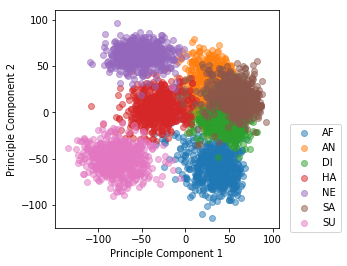

In [62]:
plt.figure(figsize = (4,4))
for i in range(7):  
    x_p = np.where(x_i == i)
    plt.scatter(x = train_acts_channel.pca()[x_p,0], y = train_acts_channel.pca()[x_p,1], alpha = 0.5)
plt.legend(data_new_full.classes, bbox_to_anchor=(1.3, 0.5))
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')

In [0]:
with open(path/'train_acts_channel.pkl', 'rb') as file:
    channel_train = pickle.load(file)

Text(0, 0.5, 'Principle Component 2')

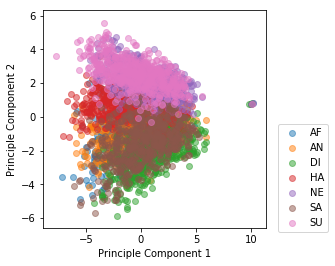

In [66]:
plt.figure(figsize = (4,4))
for i in range(7):  
    x_p = np.where(x_i == i)
    plt.scatter(x = channel_train.pca()[x_p,0], y = channel_train.pca()[x_p,1], alpha = 0.5)
plt.legend(data_new_full.classes, bbox_to_anchor=(1.3, 0.5))
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')

In [0]:
with open(path/'train_acts_window.pkl', 'rb') as file:
    window_train = pickle.load(file)

In [0]:
window_train = window_train.reshape([3780, -1])

Text(0, 0.5, 'Principle Component 2')

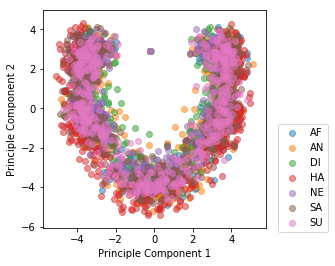

In [67]:
plt.figure(figsize = (4,4))
for i in range(7):  
    x_p = np.where(x_i == i)
    plt.scatter(x = window_train.pca()[x_p,0], y = window_train.pca()[x_p,1], alpha = 0.5)
plt.legend(data_new_full.classes, bbox_to_anchor=(1.3, 0.5))
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')